Assorted plots for mega-meats

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
#TOI 836

sedpath = '../fixed_hlsp/toi-836/hlsp_muscles_multi_multi_toi-836_broadband_v25_adapt-const-res-sed.fits'

hdspec = fits.getdata(sedpath, 1)
kw, kf = hdspec['WAVELENGTH'], hdspec['FLUX']
sol = Table.read('../Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

In [3]:
#xray for next plot
hrc_i = (0.1, 10.0) #keV
acis_s = (0.3, 10) 
epic = (0.15,15)

for x in np.vstack((hrc_i, acis_s, epic)):
    xlam = (x*u.keV).to(u.AA, equivalencies=u.spectral())
    print(xlam)
    

[123.98419843   1.23984198] Angstrom
[41.32806614  1.23984198] Angstrom
[82.65613229  0.82656132] Angstrom


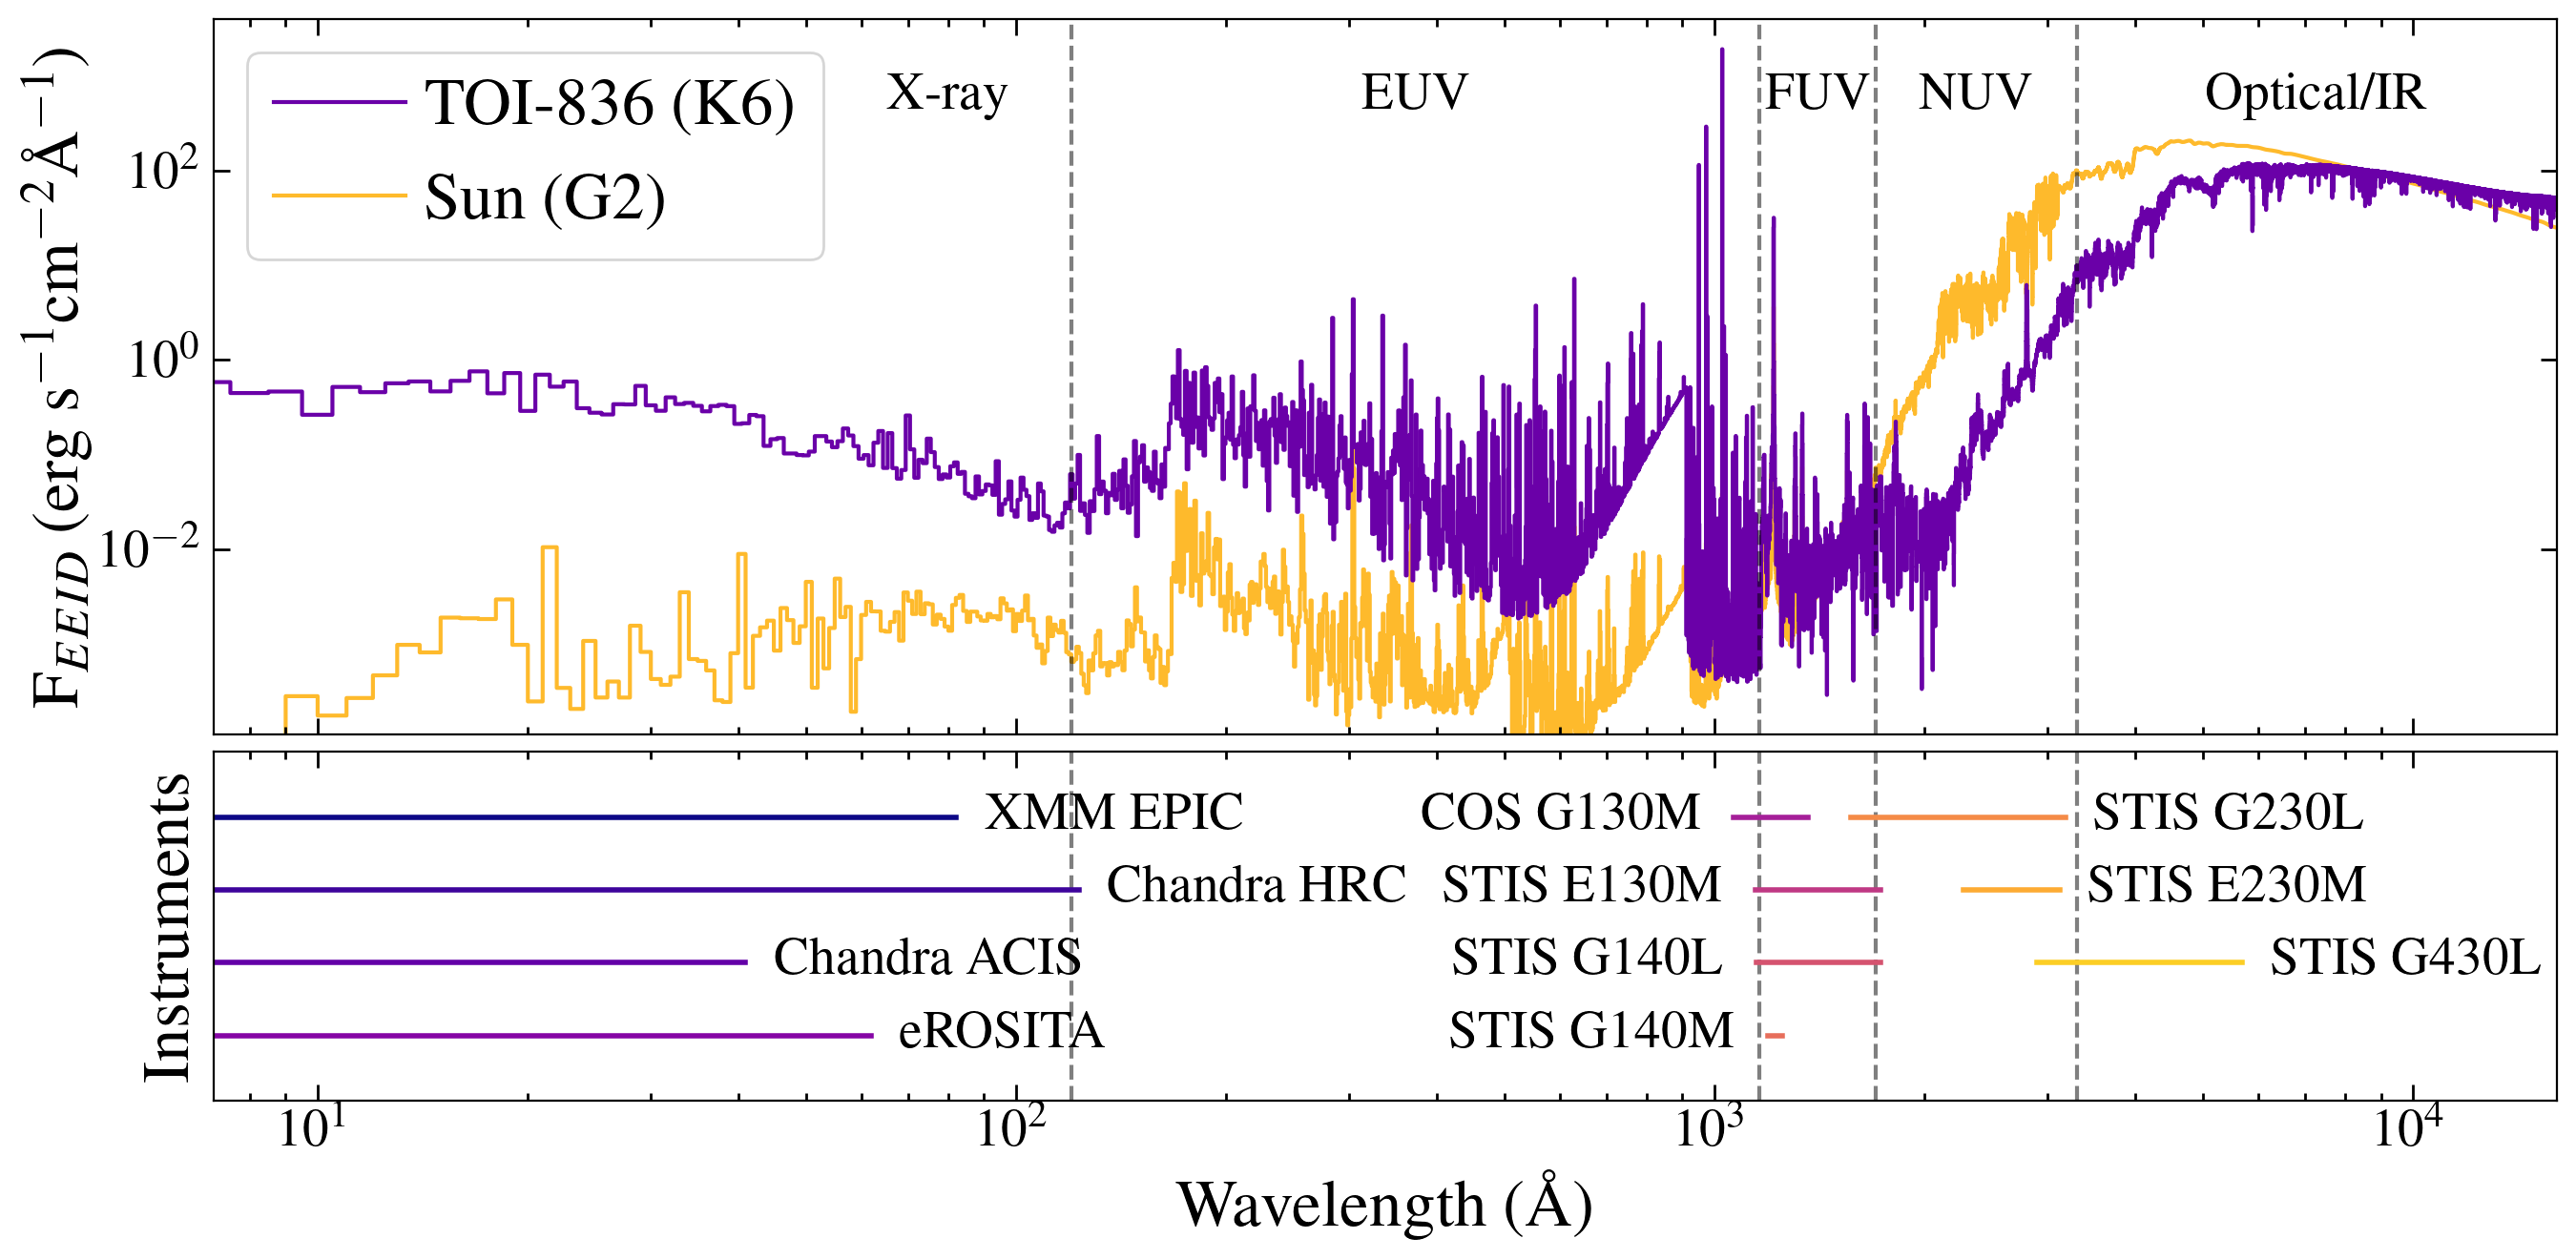

In [4]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# cols = ['C0', 'C1', 'C2']
cols = [plt.cm.plasma(0.2),plt.cm.plasma(0.85), plt.cm.plasma(0.45)]




dstar = 27.5024*u.pc
dsun = 1*u.au
lstar = 10**-0.8527588
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*u.au

solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = (dstar.to(u.m)/eeidau.to(u.m))**2
# print(bb_scale)

# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1]],figsize=(14, 7), sharex=True)


ax= axes[0]
ax.step(kw, kf*starscale, c=cols[0], label = 'TOI-836 (K6)', zorder=1, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2)', zorder=-1, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4e3)


 
bar_y = 4e2
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (7.1, 1.61e4)
ax.set_xlim(xlims[0], xlims[1])
# divlines = (120, 1160, 5690)
# divlines = (900, 3500) 
# [ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# labels = ['CXO/APEC', 'DEM', 'HST', 'PHX']
divlines = (120, 1160, 1700, 3300)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


labels = ['X-ray', 'EUV', 'FUV', 'NUV', 'Optical/IR']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    if i == 0:
        label_x = 80
    ax.annotate(label, (label_x, label_y), ha='center', va='center')


ax.legend(fontsize=25, loc=2,frameon=True)

# ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

ax1.set_xlabel('Wavelength (\AA)', size=25)
# [ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# [123.98419843   1.23984198] Angstrom
# [41.32806614  1.23984198] Angstrom
# [82.65613229  0.82656132] Angstrom

# table of bands 
# telescopes = np.array(['Chandra', 'eROSITA', 'EUVE', 'FUSE', 'GALEX', 'HST', 'IUE', 'ROSAT', 'Swift (XRT)', 'XMM-Newton'])
# bandpasses = np.array([[1.8, 24.8],[5.4, 62],[70,190],[905, 1196], [1350, 2800],[1160, 10070],[1150, 3200], [0.2, 124], [1.2,41.3], [0.8,62]])

telescopes = np.array(['Chandra HRC', 'Chandra ACIS', 'XMM EPIC', 'eROSITA', 'STIS G140L', 'STIS G140M', 'STIS E130M', 'STIS G230L', 'STIS E230M',
                      'STIS G430L', 'COS G130M'],)
bandpasses = np.array([[1.2, 123],[1.2, 41],[0.82, 82],[5.4, 62],[1150,1730], [1194, 1249], [1144, 1729],[1570,3180], [2275, 3119], 
                       [2900,5700],[1064, 1360]])


starts = bandpasses[:,0]
ends = bandpasses[:,1]
args = np.argsort(starts)
telescopes, starts, ends = telescopes[args], starts[args], ends[args]
ys = np.arange(len(telescopes))[::-1]
telcols = np.linspace(0, 0.9, len(telescopes))
for i, scope in enumerate(telescopes):
    ypos = ys[i]
    labelpos = ends[i] *1.1
    ha = 'left'
    if (starts[i] > 800) & (ends[i]< 2000) :
        labelpos = starts[i] *0.9
        ha = 'right'
        ypos += 4
    elif (ends[i] > 2000):
        ypos += 8
    # if scope == 'STIS G430L':
    ax1.annotate(scope, (labelpos, ypos), va='center', ha=ha)
    ax1.plot([starts[i], ends[i]], [ypos, ypos], c=plt.cm.plasma(telcols[i]), lw=2)

ax1.set_yticks([])

ax1.set_ylim(6.1, 10.9)
ax1.set_ylabel('Instruments', size=25)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

plt.savefig('../plots/toi836_v_sun_obs.png', facecolor='w')
plt.savefig('../plots/toi836_v_sun_obs.pdf')

Plot of what stars have what data

In [5]:
proxtab= Table.read('which_data_tab.csv')

In [6]:
proxtab

Name,Teff (K),Parallax (mas),Dist (pc),X-ray,FUV
str9,int64,float64,float64,str1,str1
WASP-63,5550,3.460921346,288.94,N,N
WASP-121,6459,3.6763,272.01,Y,Y
HIP 67522,5675,8.017041586,124.73,Y,Y
Kepler-51,5670,1.2473,801.73,N,N
GJ 367,3522,106.1726822,9.42,Y,Y
K2-18,3457,26.24687716,38.1,N,N
TOI-776,3709,36.82910606,27.15,Y,Y
GJ 341,3770,95.69817587,10.45,Y,Y
TOI-421,5325,13.3407,74.96,N,Y


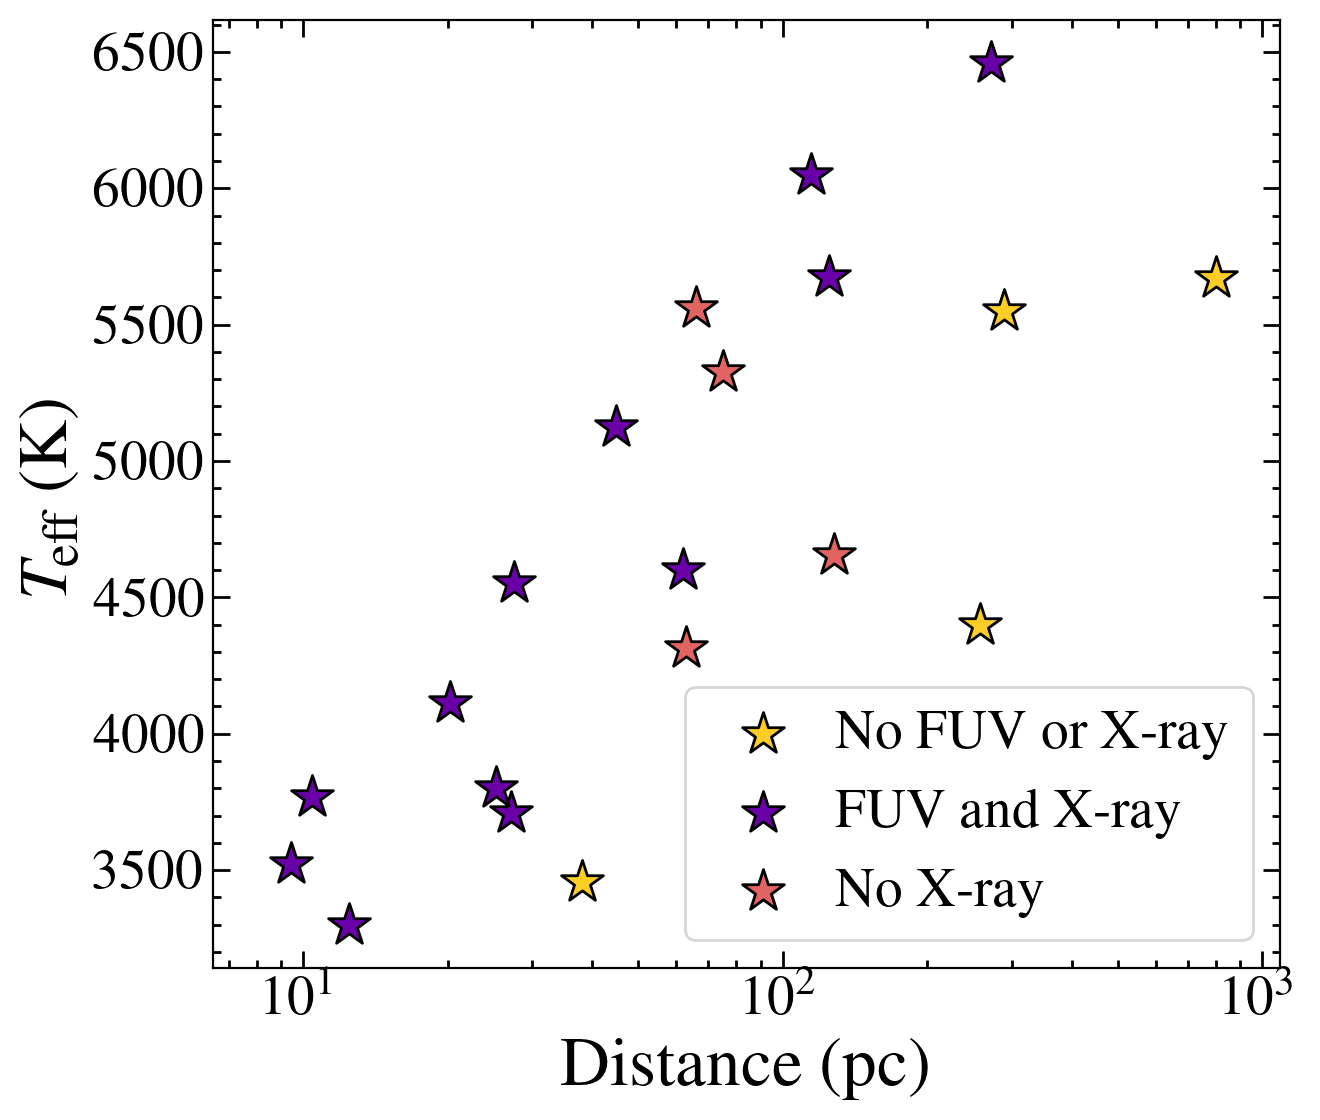

In [7]:
fig, ax = plt.subplots(figsize=(7,6))

dist = proxtab['Dist (pc)']
teff = proxtab['Teff (K)']

cols = [plt.cm.plasma(0.2), plt.cm.plasma(0.6), plt.cm.plasma(0.9)]

for i in range(len(dist)):
    if proxtab['FUV'][i] == 'N':
        label = 'No FUV or X-ray'
        col = cols[2]
    elif proxtab['X-ray'][i] == 'N':
        label = 'No X-ray'
        col = cols[1]
    else:
        label = 'FUV and X-ray'
        col = cols[0]
    ax.scatter(dist[i], teff[i], marker='*', color=col, label = label, edgecolor='k', s=250)

ax.set_xscale('log')

ax.set_xlabel('Distance (pc)', size=25)
ax.set_ylabel('$T_{\mathrm{eff}}$ (K)', size=25)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='outside upper center', ncols=2, bbox_to_anchor=(0.5, 1.2))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=4)
ax.set_xlim(6.5, 1090)

fig.tight_layout()
fig.savefig('../plots/which_data_plot.pdf')

In [122]:
# dist

big plot (place holder until all the stars are done)

In [8]:
adapt_seds = glob.glob('../draft_hlsp/*/*adapt*const*')
plot_seds = []
for sed in adapt_seds:
    if 'kap1cet' not in sed and 'tau_ceti' not in sed:
        plot_seds.append(sed)

plot_seds

['../draft_hlsp/toi-836/hlsp_muscles_multi_multi_toi-836_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/hd120411/hlsp_muscles_multi_multi_hd-120411_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/k2-18/hlsp_muscles_multi_multi_k2-18_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/kepler-51/hlsp_muscles_multi_multi_kepler-51_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/wasp-63/hlsp_muscles_multi_multi_wasp-63_broadband_v2_adapt-const-res-sed.fits',
 '../draft_hlsp/toi-776/hlsp_muscles_multi_multi_toi-776_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/gj_341/hlsp_muscles_multi_multi_gj_341_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/toi-421/hlsp_muscles_multi_multi_toi-421_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/gj_367/hlsp_muscles_multi_multi_gj_367_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/toi-134/hlsp_muscles_multi_multi_toi-134_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/wasp-121/hlsp_m

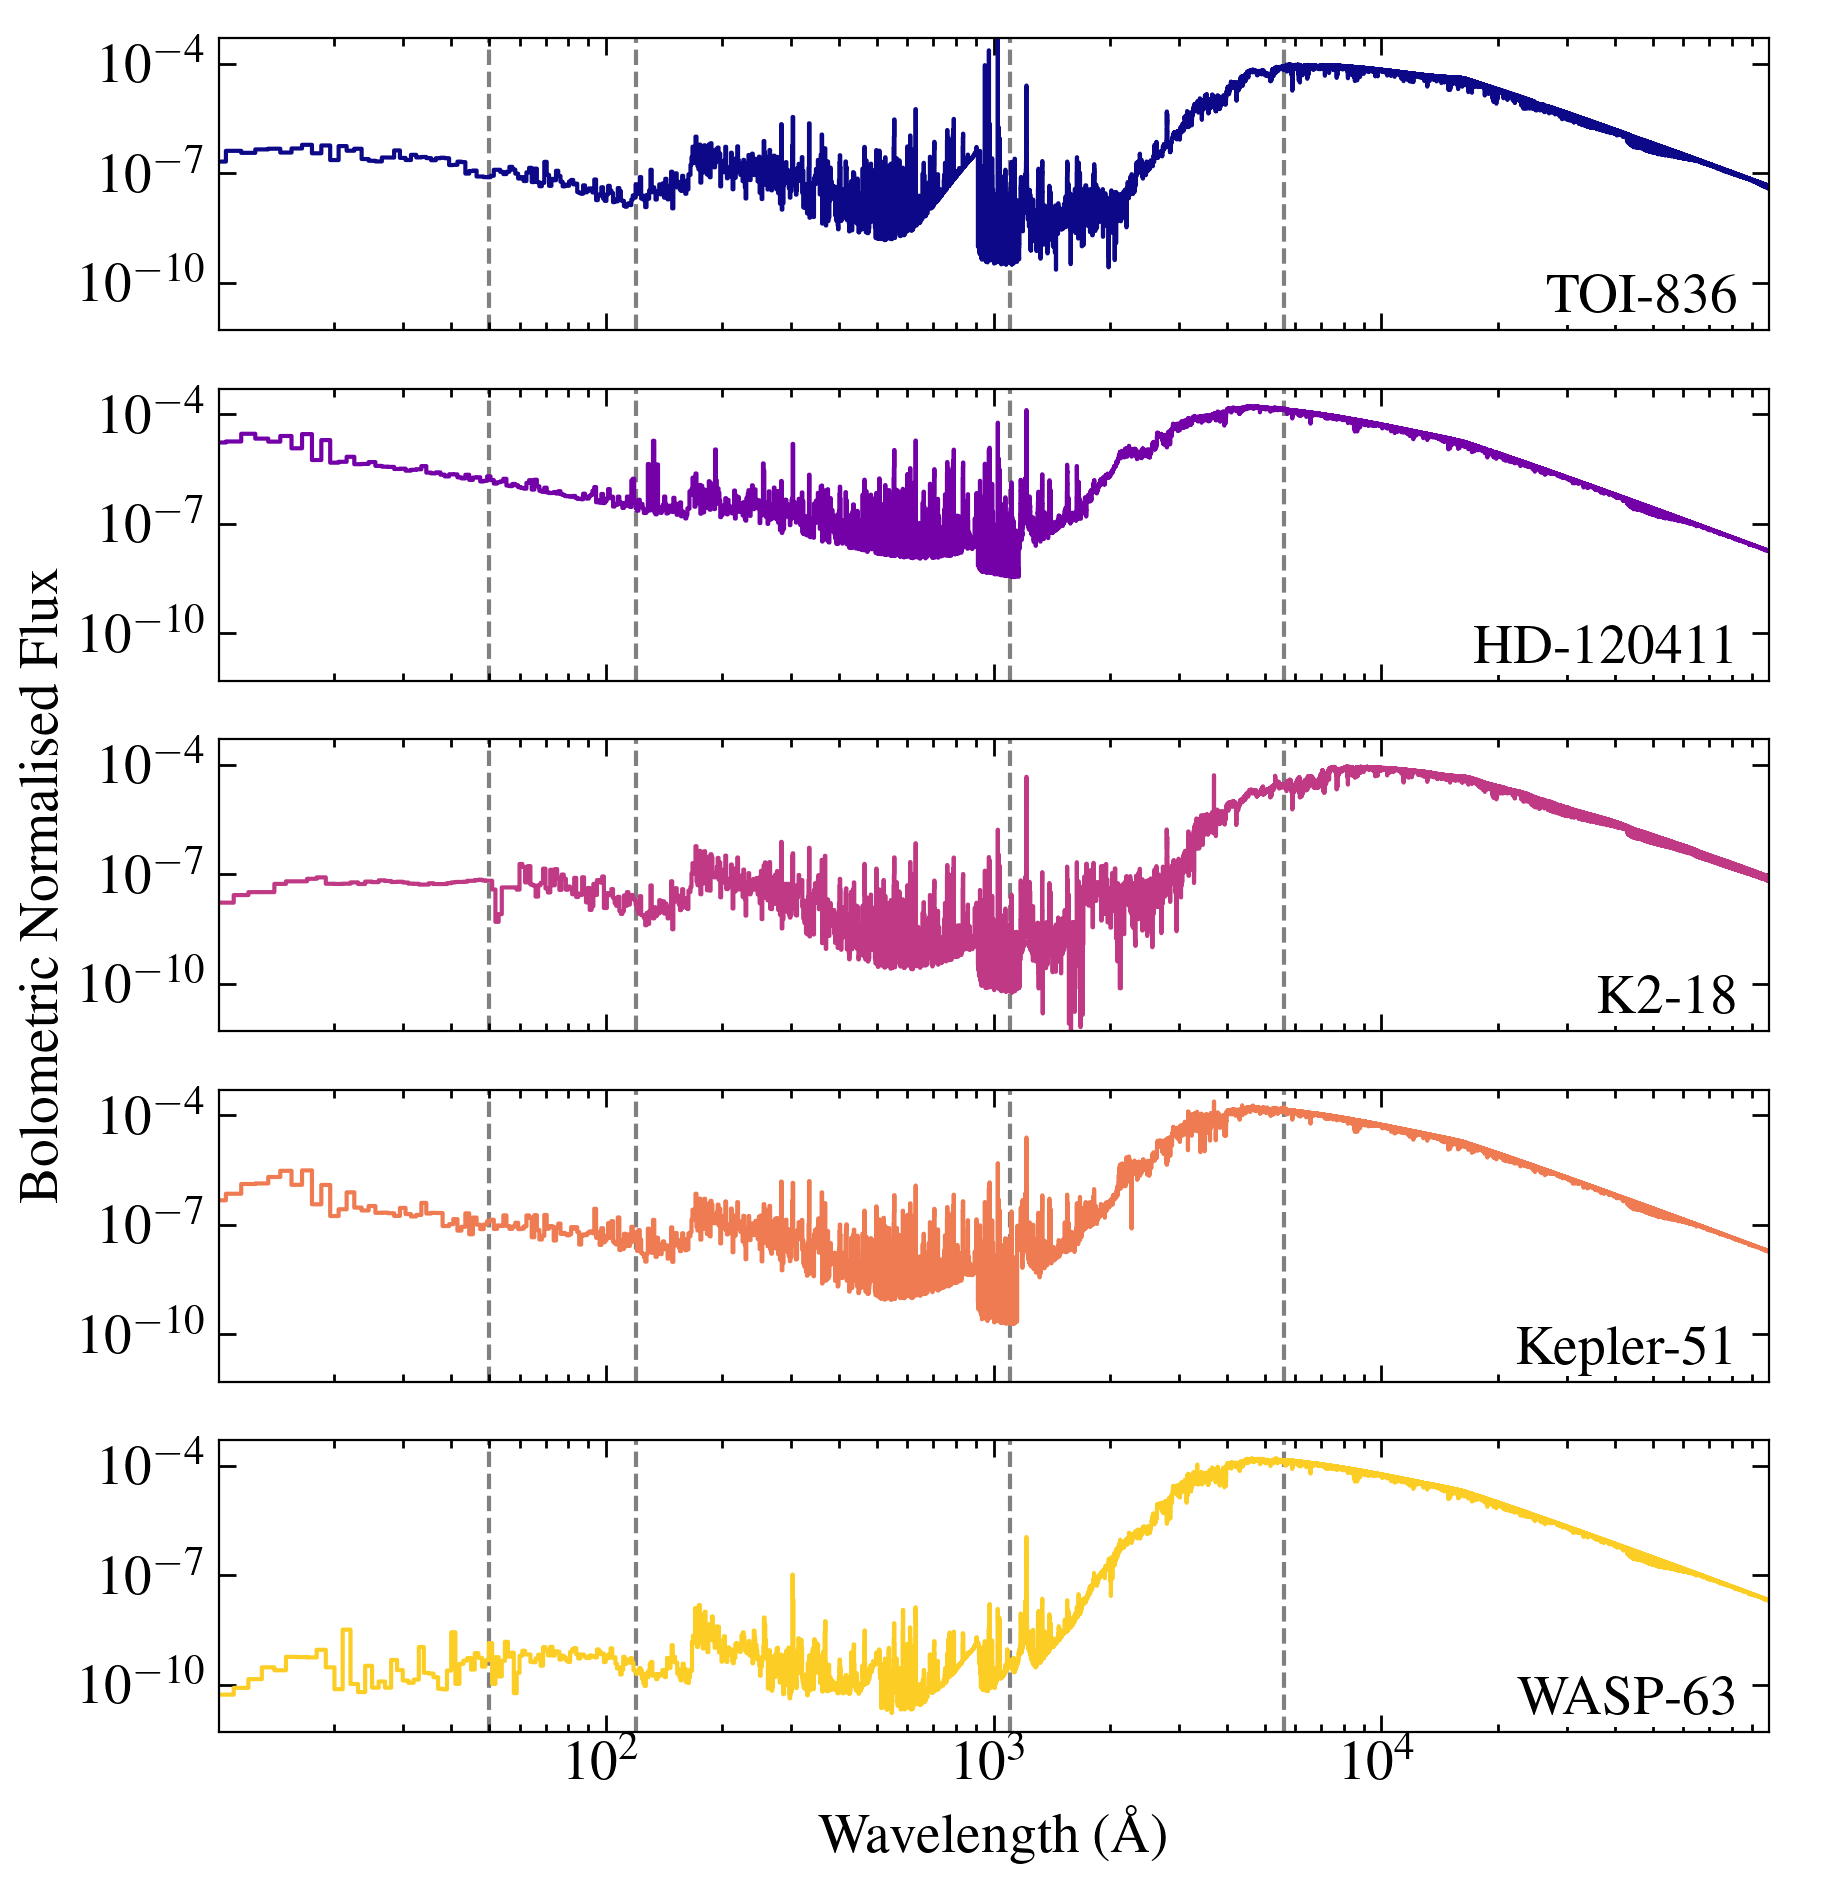

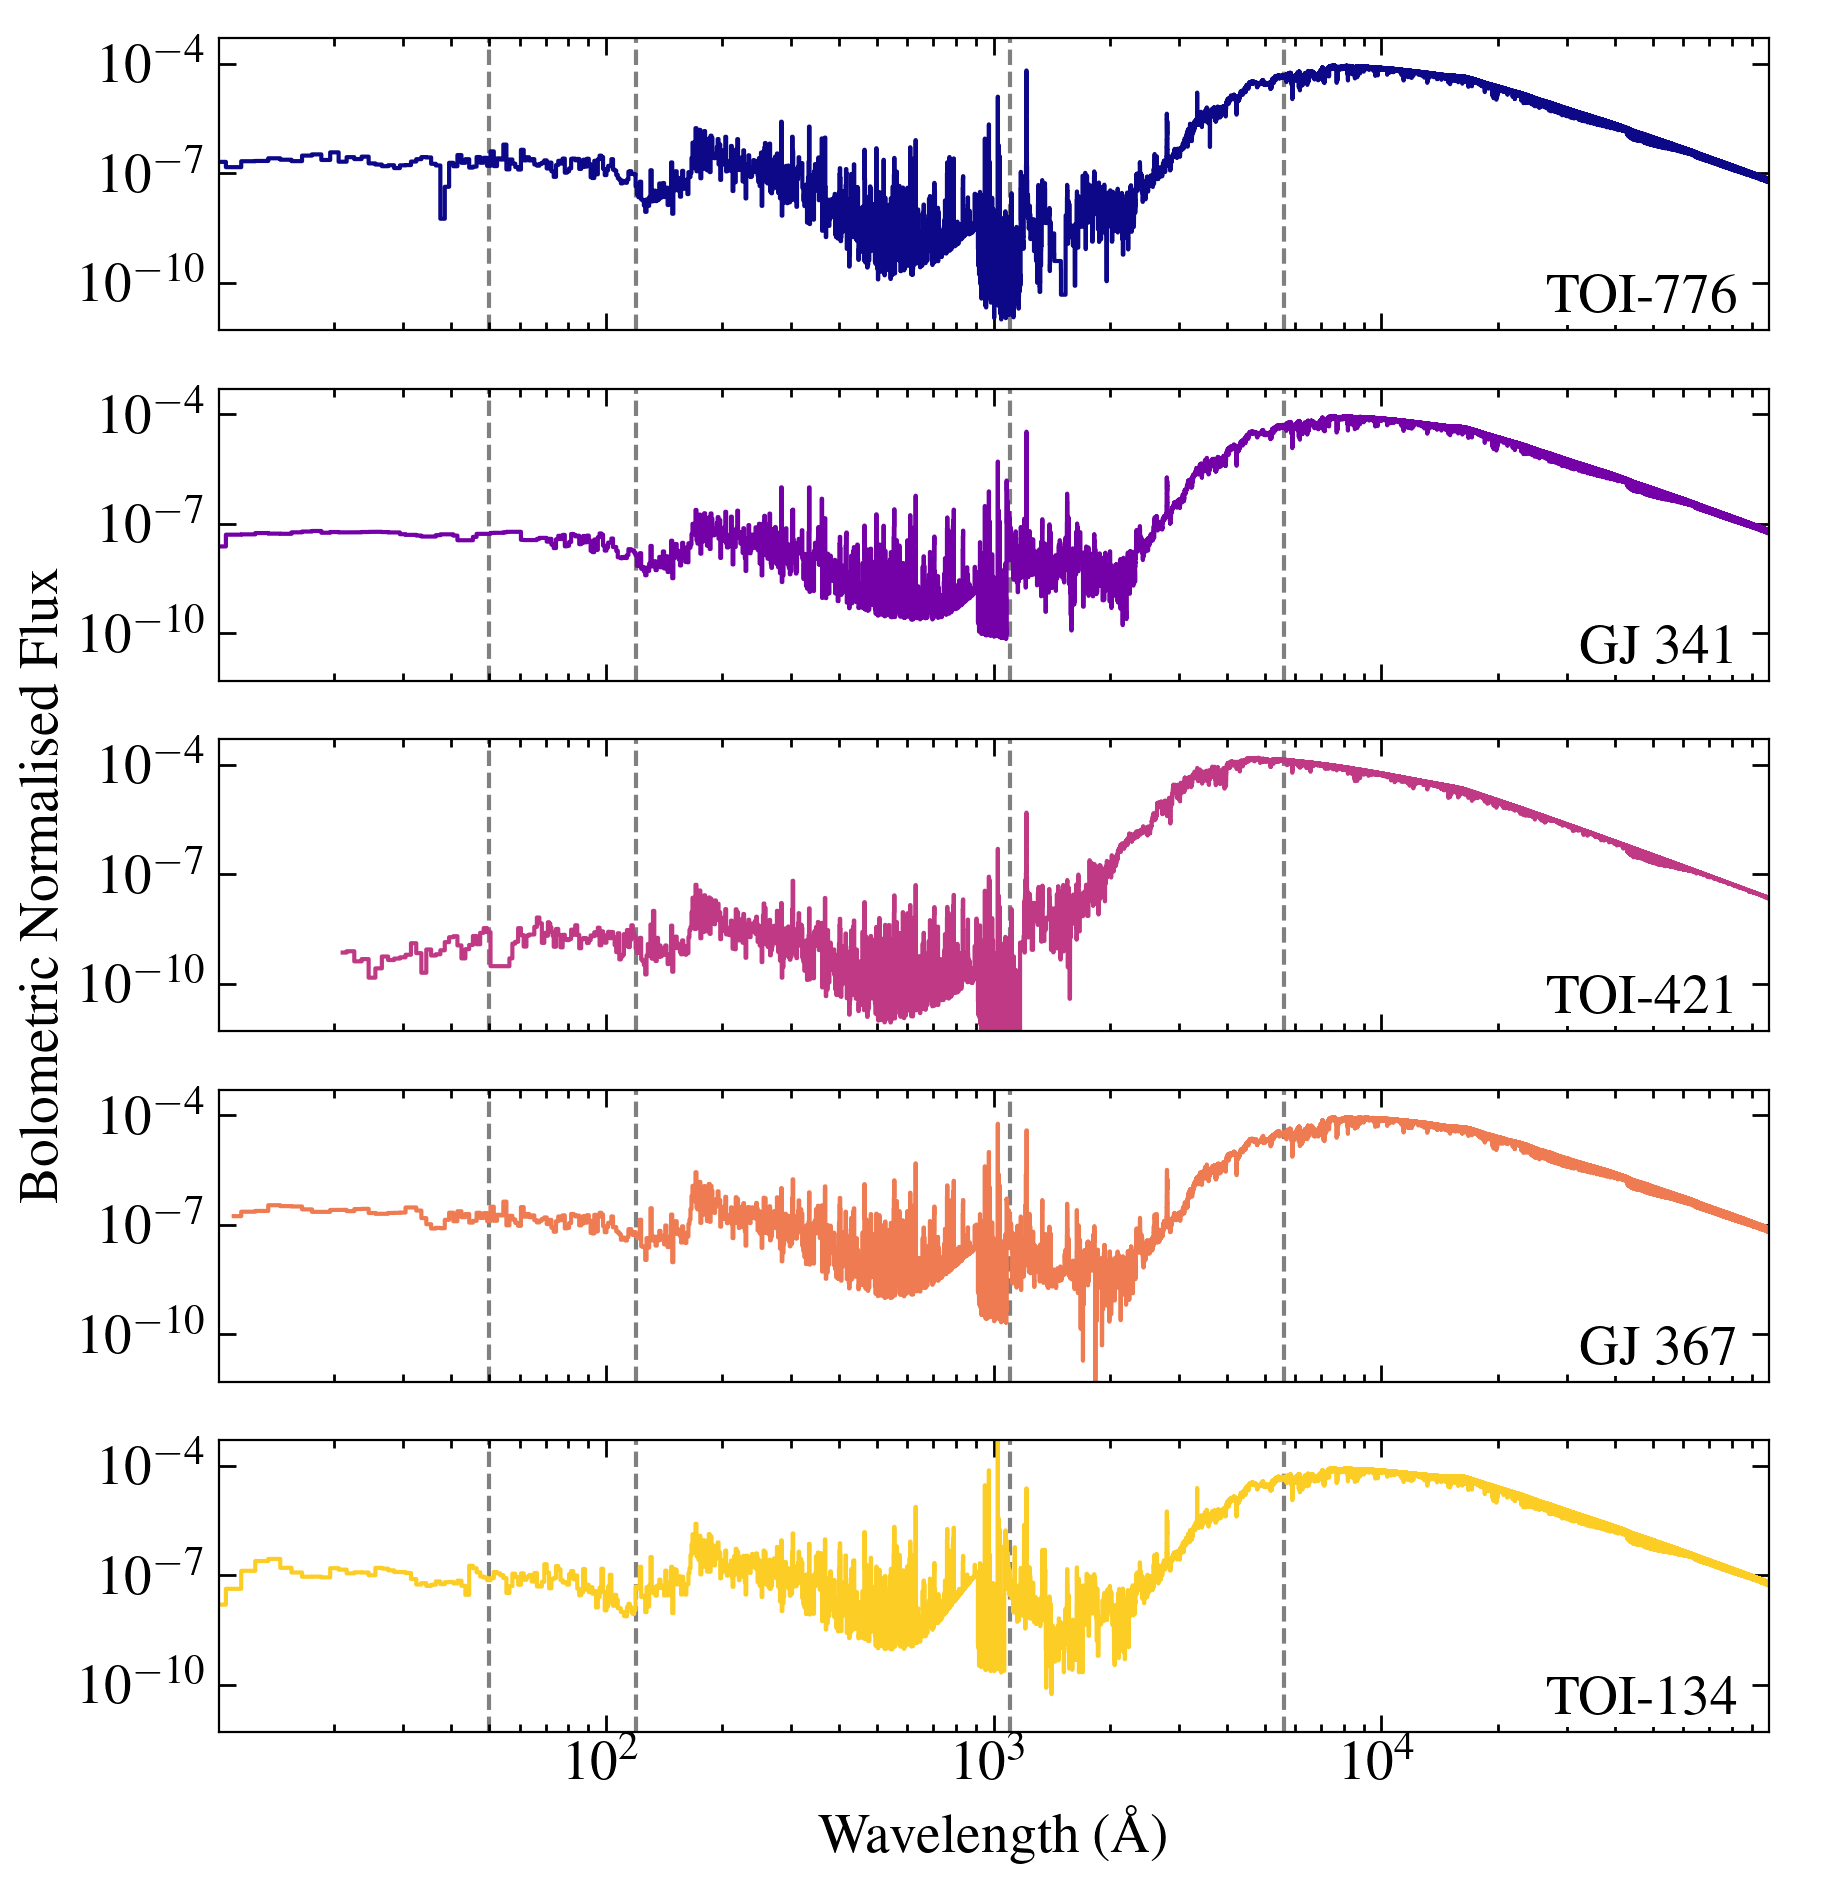

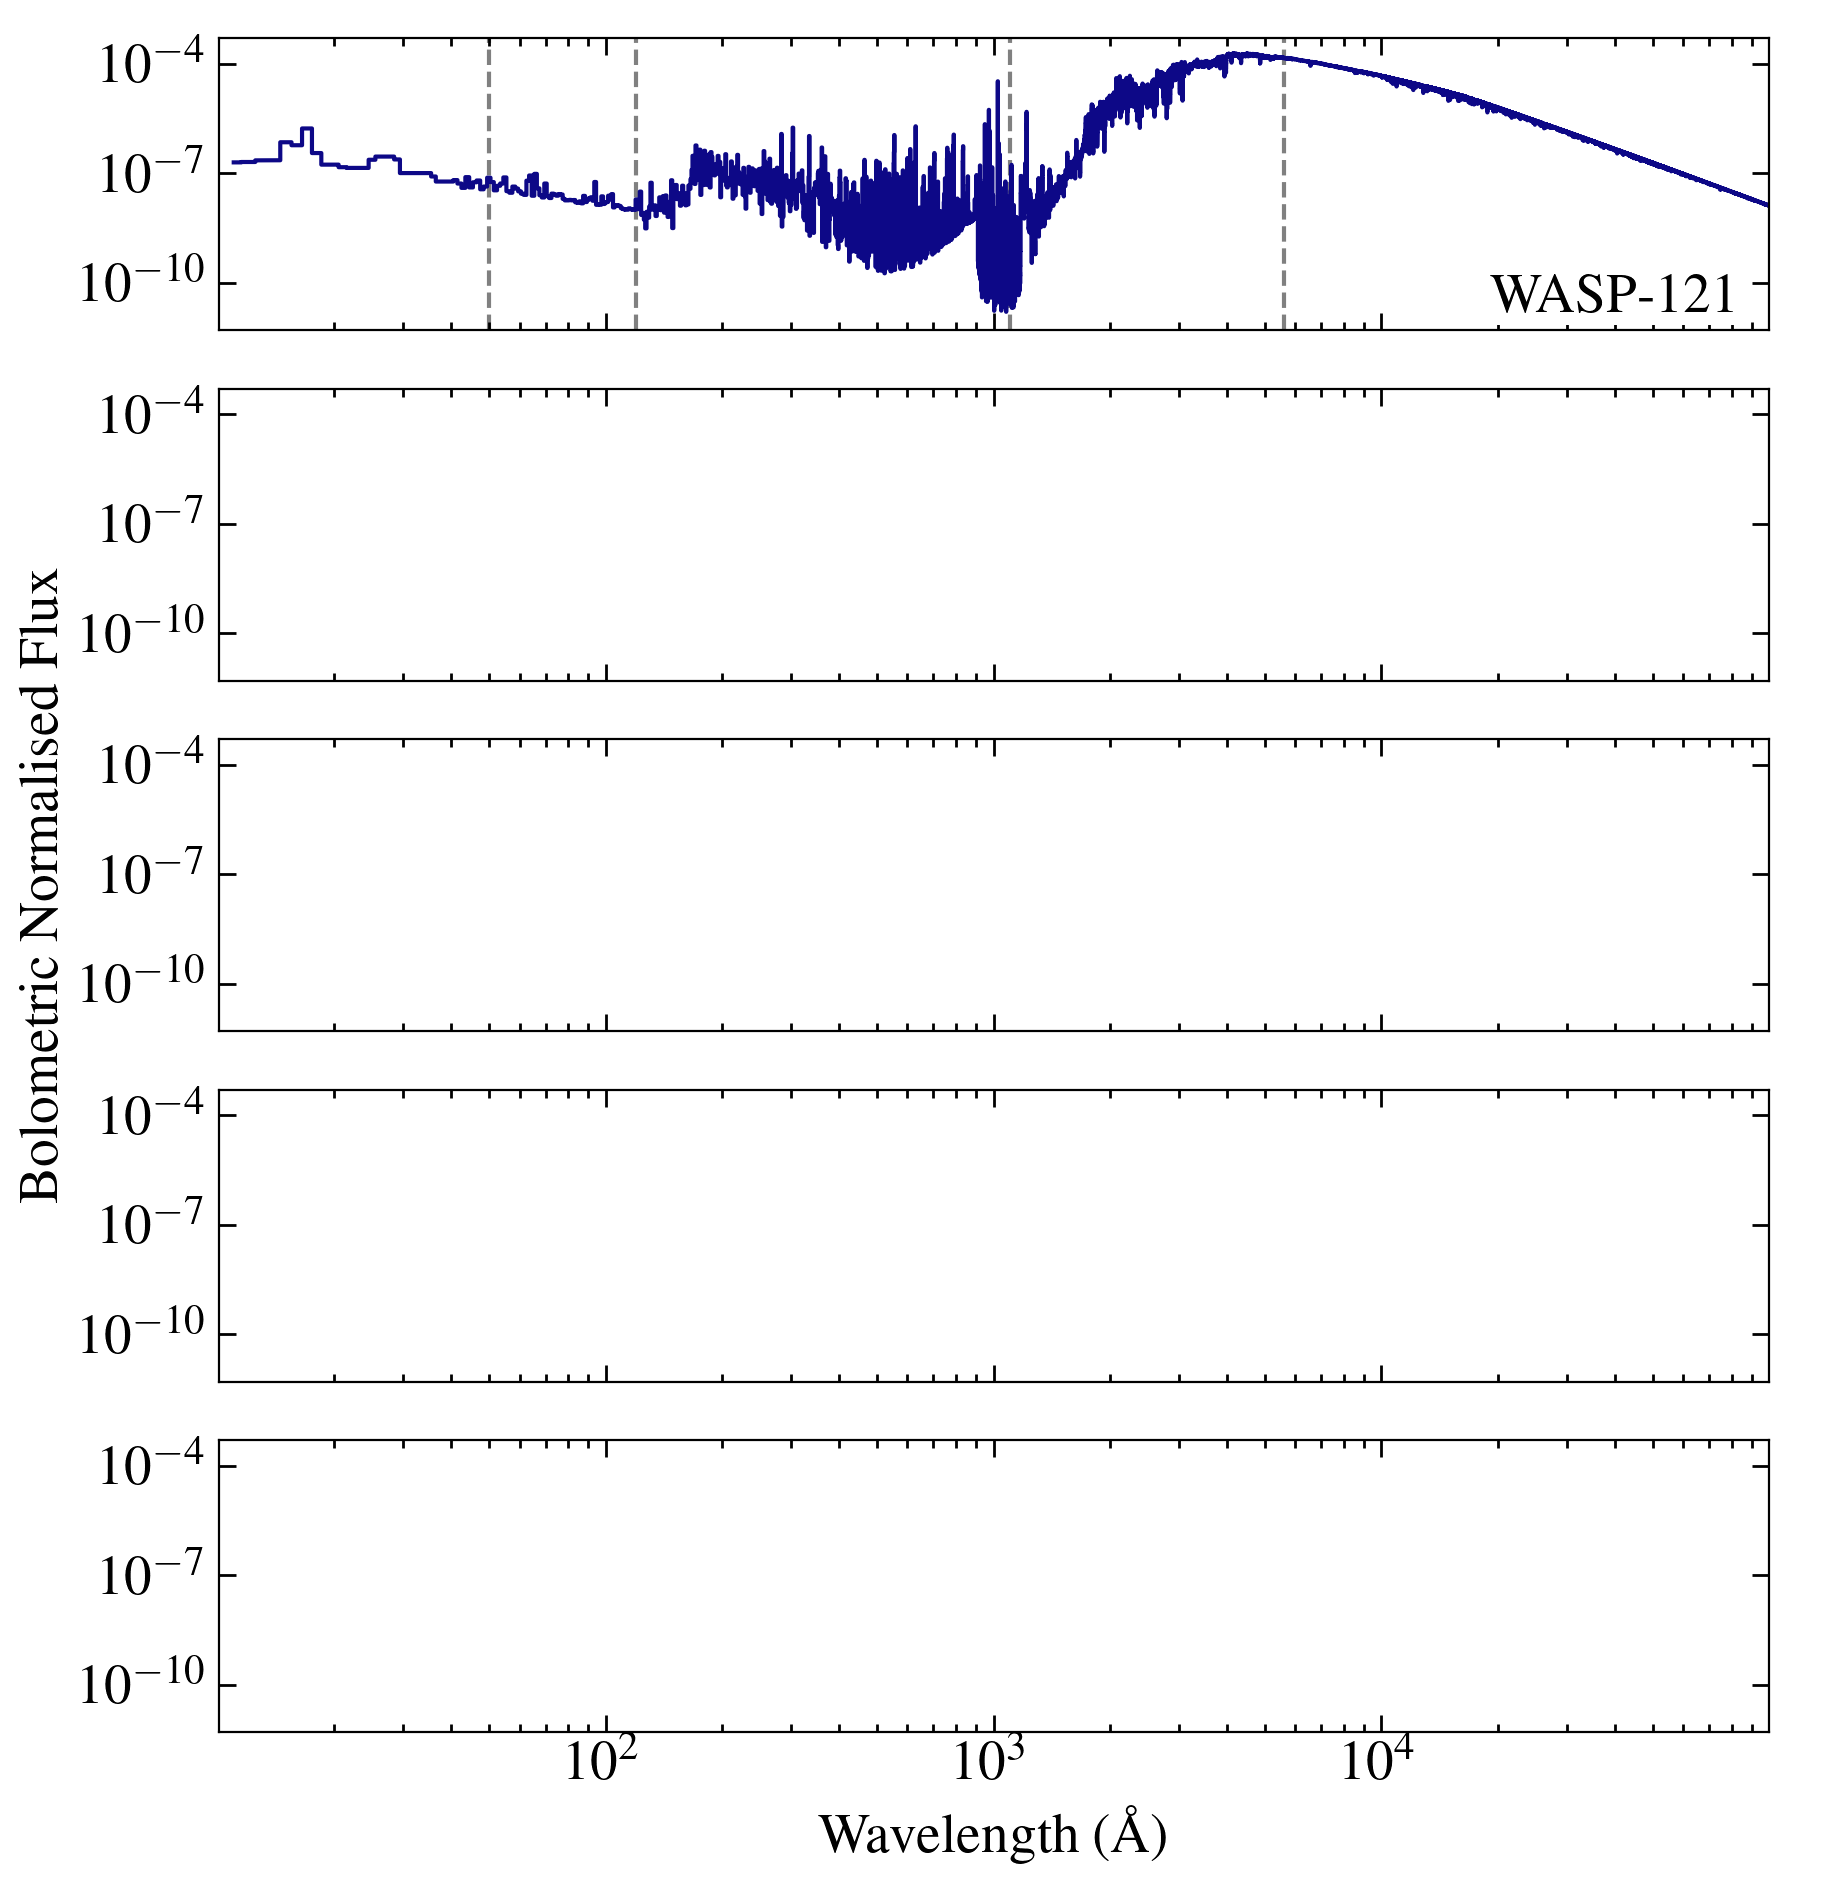

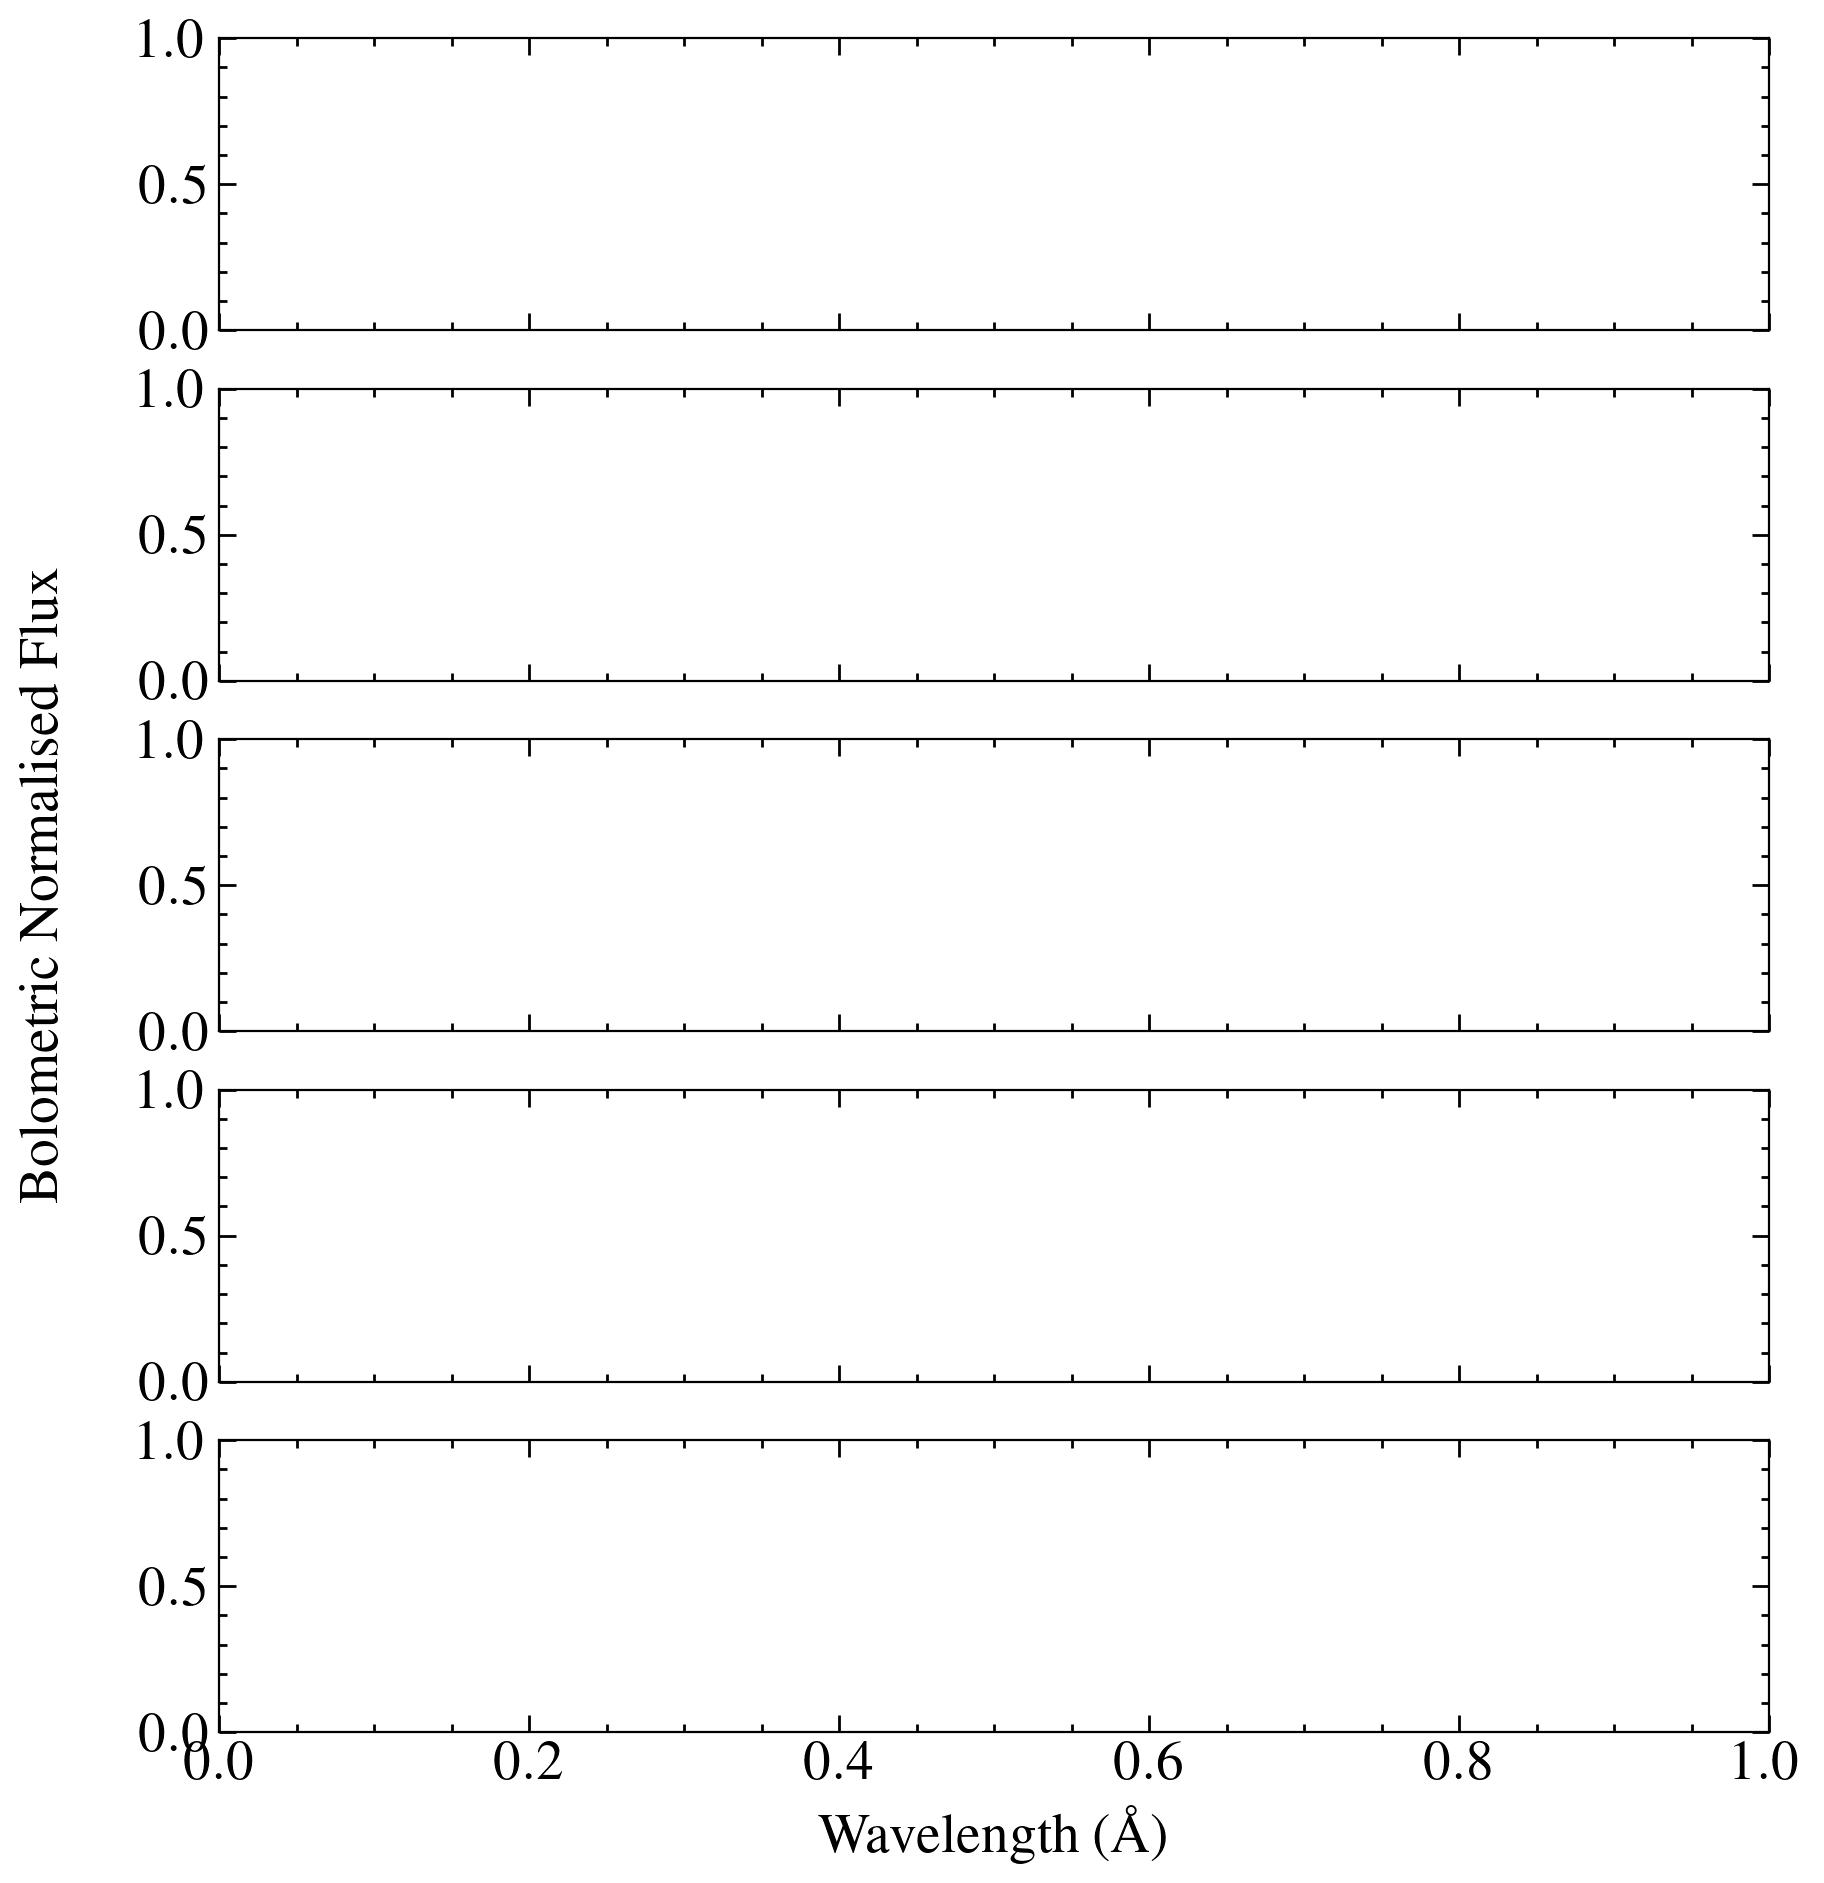

In [17]:
nstars = 5 #number of stars to plot in each plot

stars_done = [] # all seds that appear in this plot

nplots = 4 
plotn = 1#counter for which plot you're on

cols = np.linspace(0, 0.9, nstars)

for i in range(nplots):
    fig, axes = plt.subplots(sharex=True, sharey=True, nrows=5, figsize=(10, 11))

    for j in range(nstars):
        ax = axes[j]
        sed_ind = j+i*nstars
        if sed_ind < len(plot_seds): #placeholder until they're done
            spec= plot_seds[sed_ind]

            data = fits.getdata(spec, 1)
            star = fits.getheader(spec)['TARGNAME']
            stars_done.append(star)
            star = star.upper().replace('_', ' ')
            w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
            w, f = w[f >0], f[f>0]
            w, f = w[w< 1e6], f[w < 1e6]
            ax.step(w, f, c=plt.cm.plasma(cols[j]), where='mid')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_xlim(10.1, 99999.9)
            ax.set_ylim(5e-12, 5e-4,)
            ax.set_yticks((1e-10, 1e-7, 1e-4))
            # ax.annotate('{} ({}\,K)'.format(star, teffs_sort[j]), (0.98, 0.02), xycoords='axes fraction', 
            #      ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
            if star == 'KEPLER-51':
                star = 'Kepler-51'
            ax.annotate('{}'.format(star), (0.98, 0.02), xycoords='axes fraction', 
                 ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
            ax.axvline(50, ls ='--', c='0.5', zorder=-5)
            ax.axvline(120, ls ='--', c='0.5', zorder=-5)
            ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
            ax.axvline(5600, ls ='--', c='0.5', zorder=-5)

    
    bigax = fig.add_subplot(111, frame_on=False)
    bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
    bigax.set_ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
    bigax.set_xlabel('Wavelength (\AA)', size=20)
        

Alternative - scale them all to the EEID and/or 10pc, plot on top of each other. Need params list.

In [151]:
params_all = Table.read('parameters_table.csv')
mask = params_all['Proxy'] == 'N'
params = params_all[mask]

params.sort(['Teff (K)'])

In [92]:
names = np.array([n.lower() for n in params['Name']])

teffs = []
for spec in plot_seds:
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    # print(star)
    ind = np.where(names == star)[0][0]
    # starinds.append(ind)
    teffs.append(params['Teff (K)'][ind])


args = np.argsort(teffs)
seds_sort = np.array(plot_seds)[args]
teffs = np.array(teffs)[args]




In [25]:


#HIP 67522

# for star in stars_done:
    # if star.lower().replace('_',' ') in names:
        # print('yes')
    # else: print(star, 'no')



yes
hd-120411 no
yes
yes
yes
yes
yes
yes
yes
yes
yes


toi-836
hip 67522
k2-18
kepler-51
wasp-63
toi-776
gj 341
toi-421
gj 367
toi-134
wasp-121


(10, 100000.0)

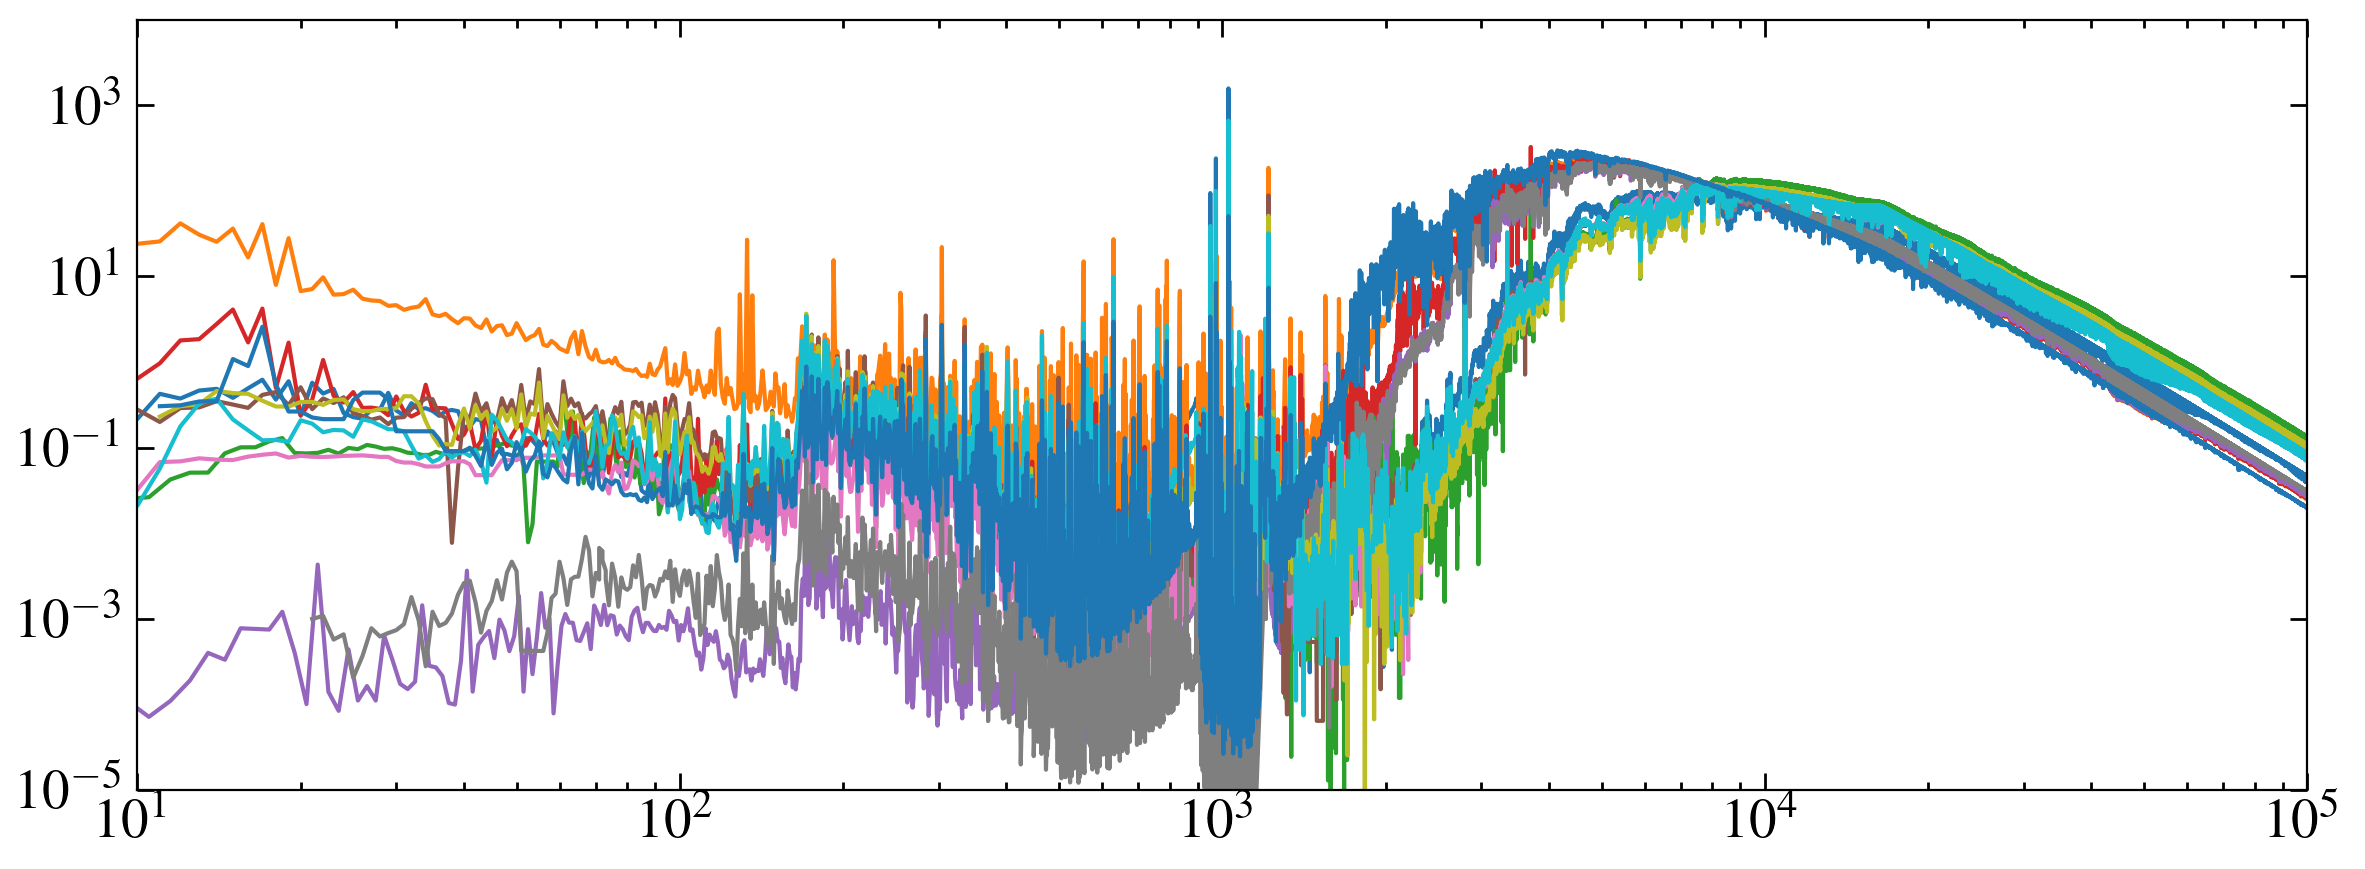

In [222]:
fig, ax = plt.subplots()

names = np.array([n.lower() for n in params['Name']])

names_done = []

for spec in plot_seds:
    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    names_done.append(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    scale = (dstar/(eeid.to(u.pc)))**2
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]

    ax.plot(w, f*scale)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-5, 1e4)
ax.set_xlim(10, 1e5)


k2-18
gj 367
toi-776
gj 341
toi-134
toi-836
toi-421
wasp-63
kepler-51
hip 67522
wasp-121


(10, 100000.0)

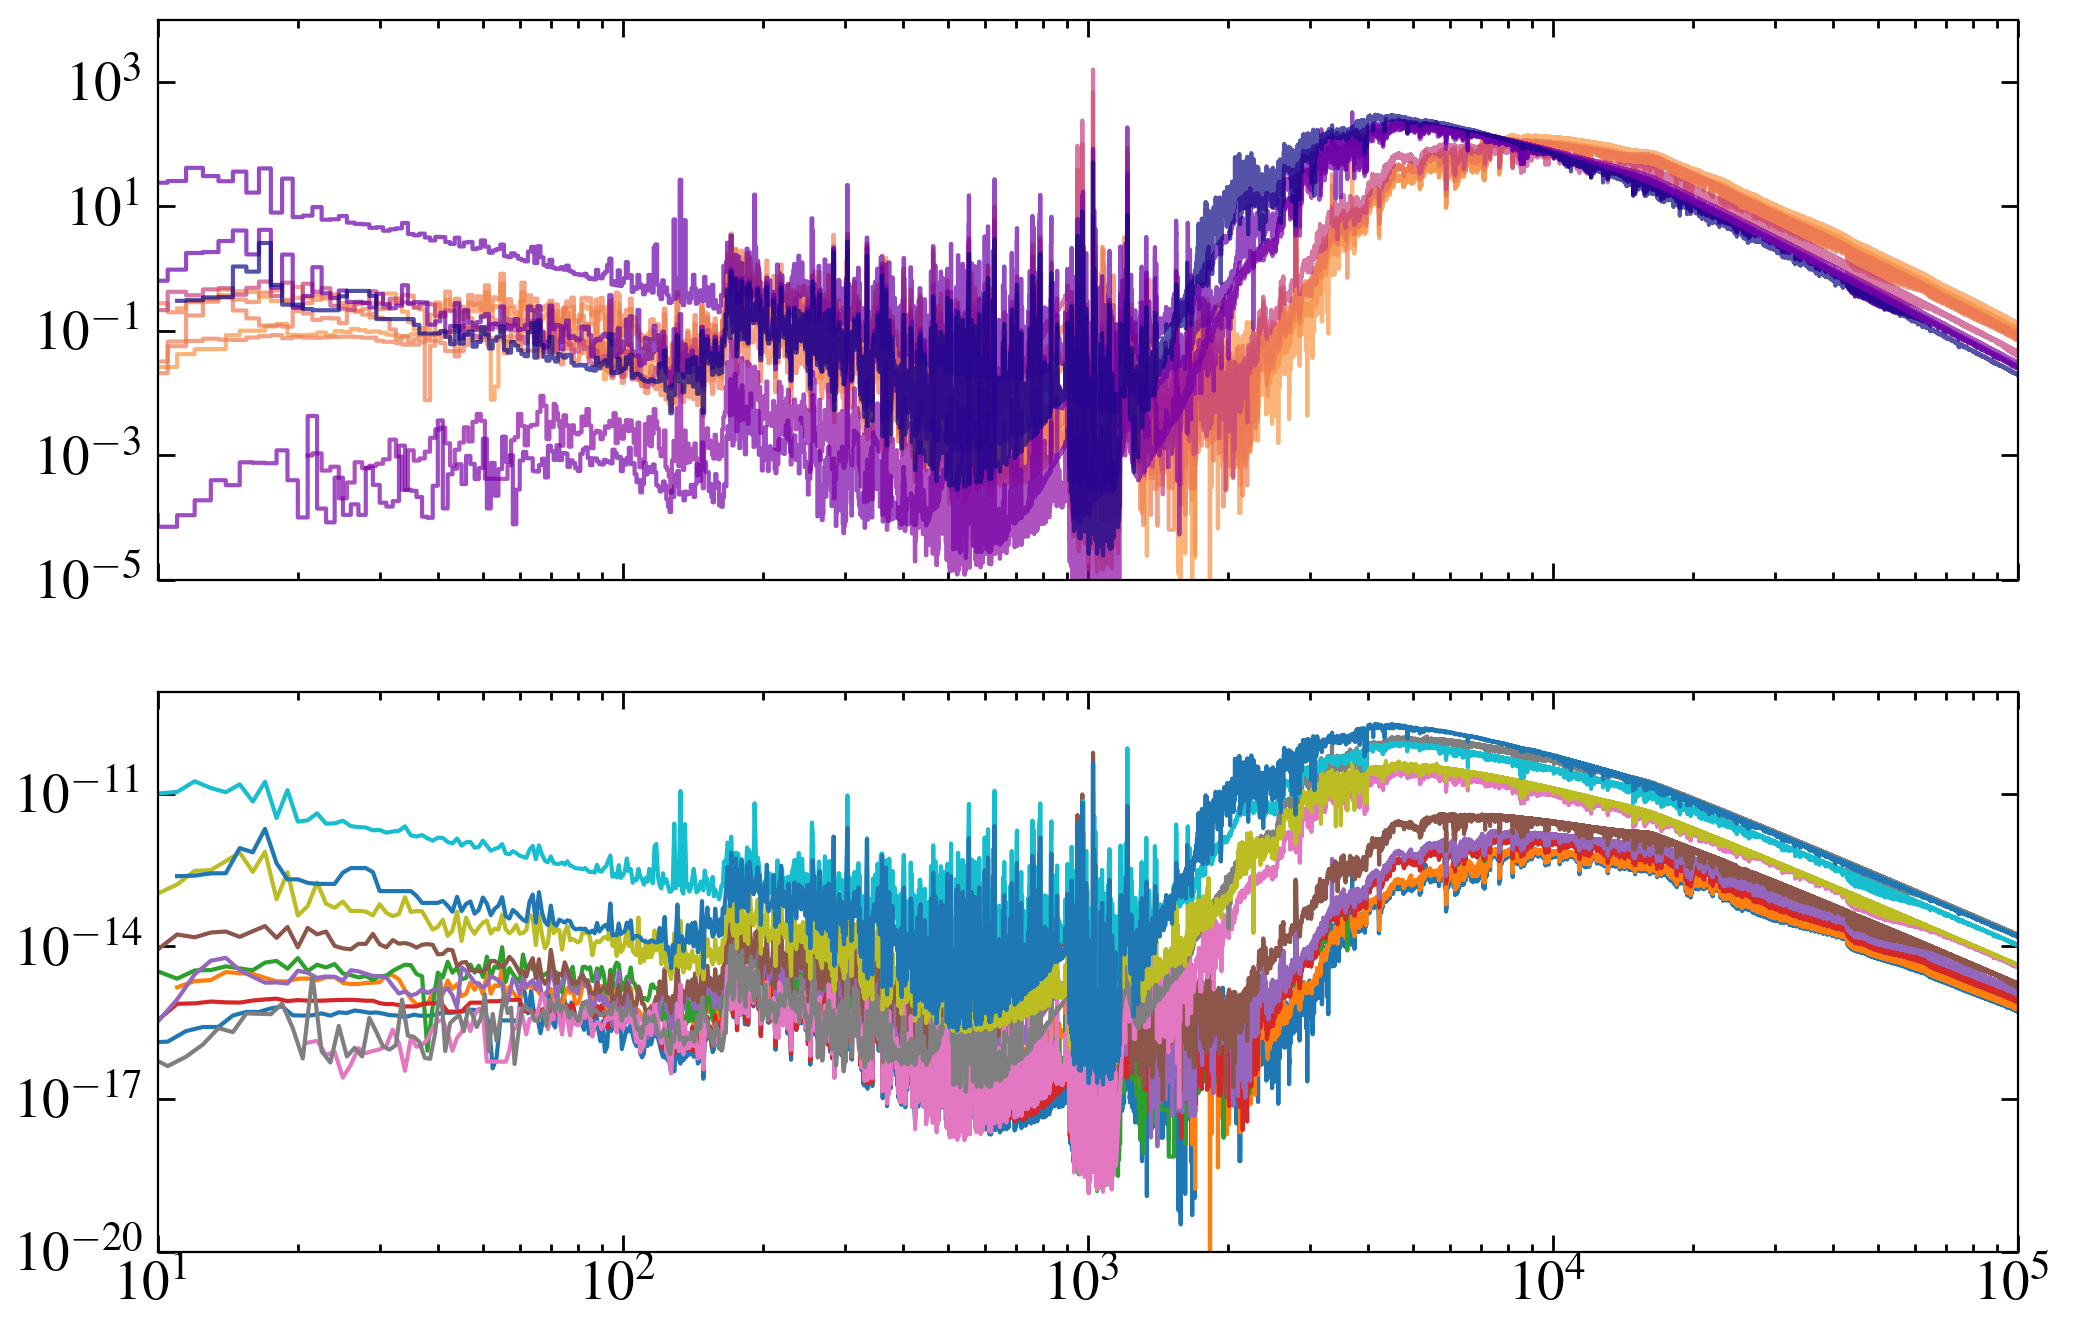

In [162]:
fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(12, 8))

names = np.array([n.lower() for n in params['Name']])

ax = axes[0]
ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-1000, vmax=max(teffs))


for i, spec in enumerate(seds_sort):


    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    scale = (dstar/(eeid.to(u.pc)))**2
    scale10 = (dstar/(10*u.pc))**2
    
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')
    ax.step(w, f*scale, c=plt.cm.plasma_r(norm(teffs[i])), alpha=0.7, where='mid')
    ax1.plot(w, f*scale10)

    

ax.set_yscale('log')
ax.set_xscale('log')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax.set_ylim(1e-5, 1e4)
ax1.set_ylim(1e-20, 1e-9)
ax.set_xlim(10, 1e5)

# ax.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r))



In [52]:
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

In [146]:
# params table
#name, spt, teff, radius, mass, prot, distance, av, refs
def make_unc_string(x, xu, xl):
    """
    Formats a parameter to latex with either a \pm or different upper and lower uncs.
    """
    if x == '--':
        return '--'
    elif xu != xl:
        return '${}^{{+{}}}_{{-{}}}$'.format(x, xu, xl)
    else:
        return '${}\pm{}$'.format(x, xl) 



for row in params:
    name = row['Name']
    spt = row['Sp Type']
    teff = make_unc_string(row['Teff (K)'], row['Teff uncertainty upper (K)'], row['Teff uncertainty lower (K)'])
    radius = make_unc_string(row['Radius (Rsun)'], row['Radius uncertainty upper'], row['Radius uncertainty lower'])
    mass = make_unc_string(row['Mass'], row['Mass uncertainty upper'], row['Mass uncertainty lower'])
    prot = make_unc_string(row['Prot (days)'], row['Prot Uncertainty Upper (days)'], row['Prot Uncertainty Lower (days)'])
    # distance = make_unc_string(row['Teff (K)'], row['Teff uncertainty upper (K)'], row['Teff uncertainty lower (K)'])
    distance = row['Dist (pc)']
    av = make_unc_string(row['AV (mag)'], row['AV uncertainty upper (mag)'], row['AV uncertainty lower (mag)'])
    

    line = '{} & {} & {} & {} & {} & {} & {} & {} & refs \\\\'.format(name, spt, teff, radius, mass, prot, distance, av)
    print(line)

GJ 4102 & M3.5V & $3300^{+80}_{-30}$ & $0.2789\pm0.0014$ & $0.284\pm0.025$ & $79.32\pm0.0$ & 12.48 & $~0^{+0}_{-0.0}$ & refs \\
K2-18 & M2.5V & $3457\pm39$ & $0.411\pm0.038$ & $0.359\pm0.047$ & $38.6^{+0.6}_{-0.4}$ & 38.1 & $~0^{+0}_{-0.0}$ & refs \\
GJ 367 & M1 & $3522\pm70$ & $0.457\pm0.013$ & $0.454\pm0.011$ & $0.0^{+44.0}_{-49.0}$ & 9.42 & $~0^{+0}_{-0.0}$ & refs \\
TOI-776 & M1V & $3709\pm70$ & $0.538\pm0.024$ & $0.544\pm0.028$ & $0.0^{+30.0}_{-40.0}$ & 27.15 & $~0^{+0}_{-0.0}$ & refs \\
GJ 341 & M0 & $3770\pm40$ & $0.5066^{+0.0169}_{-0.0172}$ & $0.48\pm0.03$ & $--\pm--$ & 10.45 & $--\pm--$ & refs \\
TOI-134 & M1V & $3800\pm70$ & $0.6\pm0.022$ & $0.62\pm0.03$ & $29.8\pm1.3$ & 25.18 & $~0^{+0}_{-0.0}$ & refs \\
TOI-260 & M0V & $4111\pm171$ & $0.6182\pm0.0599$ & $--\pm--$ & $--\pm--$ & 20.21 & $--\pm--$ & refs \\
TOI-178 & mid/late K & $4316\pm70$ & $0.651\pm0.011$ & $0.65^{+0.027}_{-0.029}$ & $-36.0\pm0.0$ & 62.81 & $~0^{+0}_{-0.0}$ & refs \\
NGTS-10 & K5V & $4400\pm100$ & $0.697\p

In [135]:
params.dtype.names

('Name',
 'Proxy',
 'Sp Type',
 'Rossby number uncertainty',
 'Age (Gyr)',
 'Age Uncertianty Upper (Gyr)',
 'Age Uncertainty Lower (Gyr)',
 'Prot (days)',
 'Prot Uncertainty Upper (days)',
 'Prot Uncertianty Lower (days)',
 'AV (mag)',
 'AV uncertainty upper (mag)',
 'AV uncertainty lower (mag)',
 'Parallax (mas)',
 'Dist (pc)',
 'Teff (K)',
 'Teff uncertainty upper (K)',
 'Teff uncertainty lower (K)',
 'log g',
 'log g uncertainty upper',
 'log g uncertainty lower',
 'Radius (Rsun)',
 'Radius uncertainty upper',
 'Radius uncertainty lower',
 'Mass',
 'Mass uncertainty upper',
 'Mass uncertainty lower',
 'Lbol (calculated)',
 'Prot reference',
 'AV reference',
 'Teff reference',
 'log g reference',
 'Radius reference',
 'Mass reference',
 'Age reference')

In [166]:
planets_table = Table.read('../planet_params/PS_2025.01.22_16.04.15.csv', format='csv', comment='#')

In [168]:
len(np.unique(planets_table['hostname']))

19

In [169]:
np.unique(planets_table['hostname'])

GJ 367
HATS-72
HD 15337
HD 80606
HIP 67522
K2-141
K2-18
Kepler-51
L 168-9
LHS 475
NGTS-10


GJ 341 b  is only a candidate
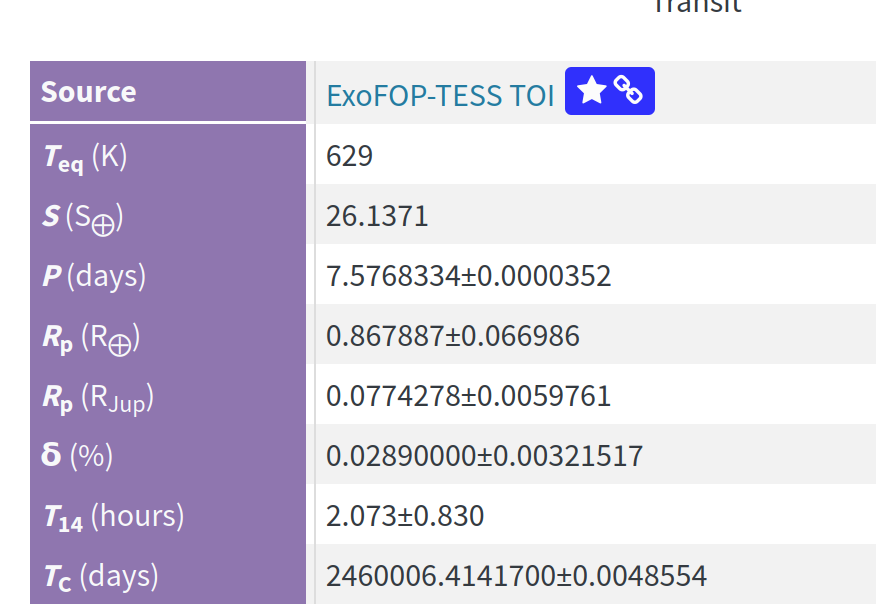

In [172]:
planets_table.dtype.names

('pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [218]:
#a, p, mp, rp

planets = np.unique(planets_table['pl_name'])
planet_hosts = []
planet_mass = []
planet_radius = []
planet_period = []
planet_a = []

def find_a(mstar, pplanet):
    a = (((const.G * mstar*const.M_sun)/(4*np.pi**2))*((pplanet*u.d).to(u.s))**2)**(1/3)
    return a.to(u.au).value

for planet in planets:
    mask = planets_table['pl_name'] == planet
    pl_tab = planets_table[mask]
    # mask = (pl_tab['pl_bmasse'] > 0) & (pl_tab['pl_rade'] > 0) & (pl_tab['pl_orbper'] > 0) & (pl_tab['pl_orbsmax'] > 0)
    # mask = (pl_tab['pl_bmasse'] > 0) & (pl_tab['pl_rade'] > 0) & (pl_tab['pl_orbper'] > 0)# & (pl_tab['pl_orbsmax'] > 0)
    # mask =  (pl_tab['pl_rade'] > 0) & (pl_tab['pl_orbper'] > 0)# & (pl_tab['pl_orbsmax'] > 0)
    mask = (pl_tab['pl_orbper'] >0)
    pl_tab = pl_tab[mask]
    # if len(pl_tab) > 0:
    recent = np.argmax(pl_tab['pl_pubdate'])
    pl_tab = pl_tab[recent]
    planet_hosts.append(pl_tab['hostname'])
    planet_mass.append(pl_tab['pl_bmasse'])
    planet_radius.append(pl_tab['pl_rade'])
    planet_period.append(pl_tab['pl_orbper'])
    if pl_tab['pl_orbsmax'] > 0:
        planet_a.append(pl_tab['pl_orbsmax'])
    else:
        a = find_a(pl_tab['st_mass'], pl_tab['pl_orbper'])
        planet_a.append(a)
# else: 
        # print(planet, 'something missing')
print(planet_a)

[0.00709, 0.07710378688218349, 0.15969755117801473, 0.06648091444546339, 0.05245, 0.1235, 0.4602, 0.0748, 0.1228, 0.00747, 0.0683, 0.1591, 0.06, 0.24480630529589573, 0.3741456541027422, 0.4959073409011923, 0.7950700131902536, 0.0208, 0.02037, 0.0143, 0.02607, 0.037, 0.0592, 0.0783, 0.1039, 0.1275, 0.0943, 0.0554, 0.117, 0.0653, 0.1001, 0.0422, 0.075, 0.025431306685511787, 0.06417577231847622, 0.05745329709231503]


In [193]:
const.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [230]:
mask = [planet[-1] == 'b' for planet in planets]
planet_b_a = np.array(planet_a)[mask]

for i , planet in enumerate(planet_b_a):
    print(np.array(planet_hosts)[mask][i], planet)

# print(planet_b_a, np.array(planet_hosts)[mask])
print(names_done)

find_a(0.47, 7.5768334) #gj367

GJ 367 0.00709
HATS-72 0.06648091444546339
HD 15337 0.05245
HD 80606 0.4602
HIP 67522 0.0748
K2-141 0.00747
K2-18 0.1591
Kepler-51 0.24480630529589573
L 168-9 0.0208
LHS 475 0.02037
NGTS-10 0.0143
TOI-178 0.02607
TOI-260 0.0943
TOI-421 0.0554
TOI-776 0.0653
TOI-836 0.0422
WASP-121 0.025431306685511787
WASP-166 0.06417577231847622
WASP-63 0.05745329709231503
['toi-836', 'hip 67522', 'k2-18', 'kepler-51', 'wasp-63', 'toi-776', 'gj 341', 'toi-421', 'gj 367', 'toi-134', 'wasp-121']


0.05869829592452165

In [233]:
planet_as_temp = [0.0422,0.0748,0.1591,0.2448,0.05745, 0.0653,0.058698,0.0554,0.00709,0.0208,0.0254]

# semi major axis for SEDS done as of 20250123

k2-18
gj 367
toi-776
gj 341
toi-134
toi-836
toi-421
wasp-63
kepler-51
hip 67522
wasp-121


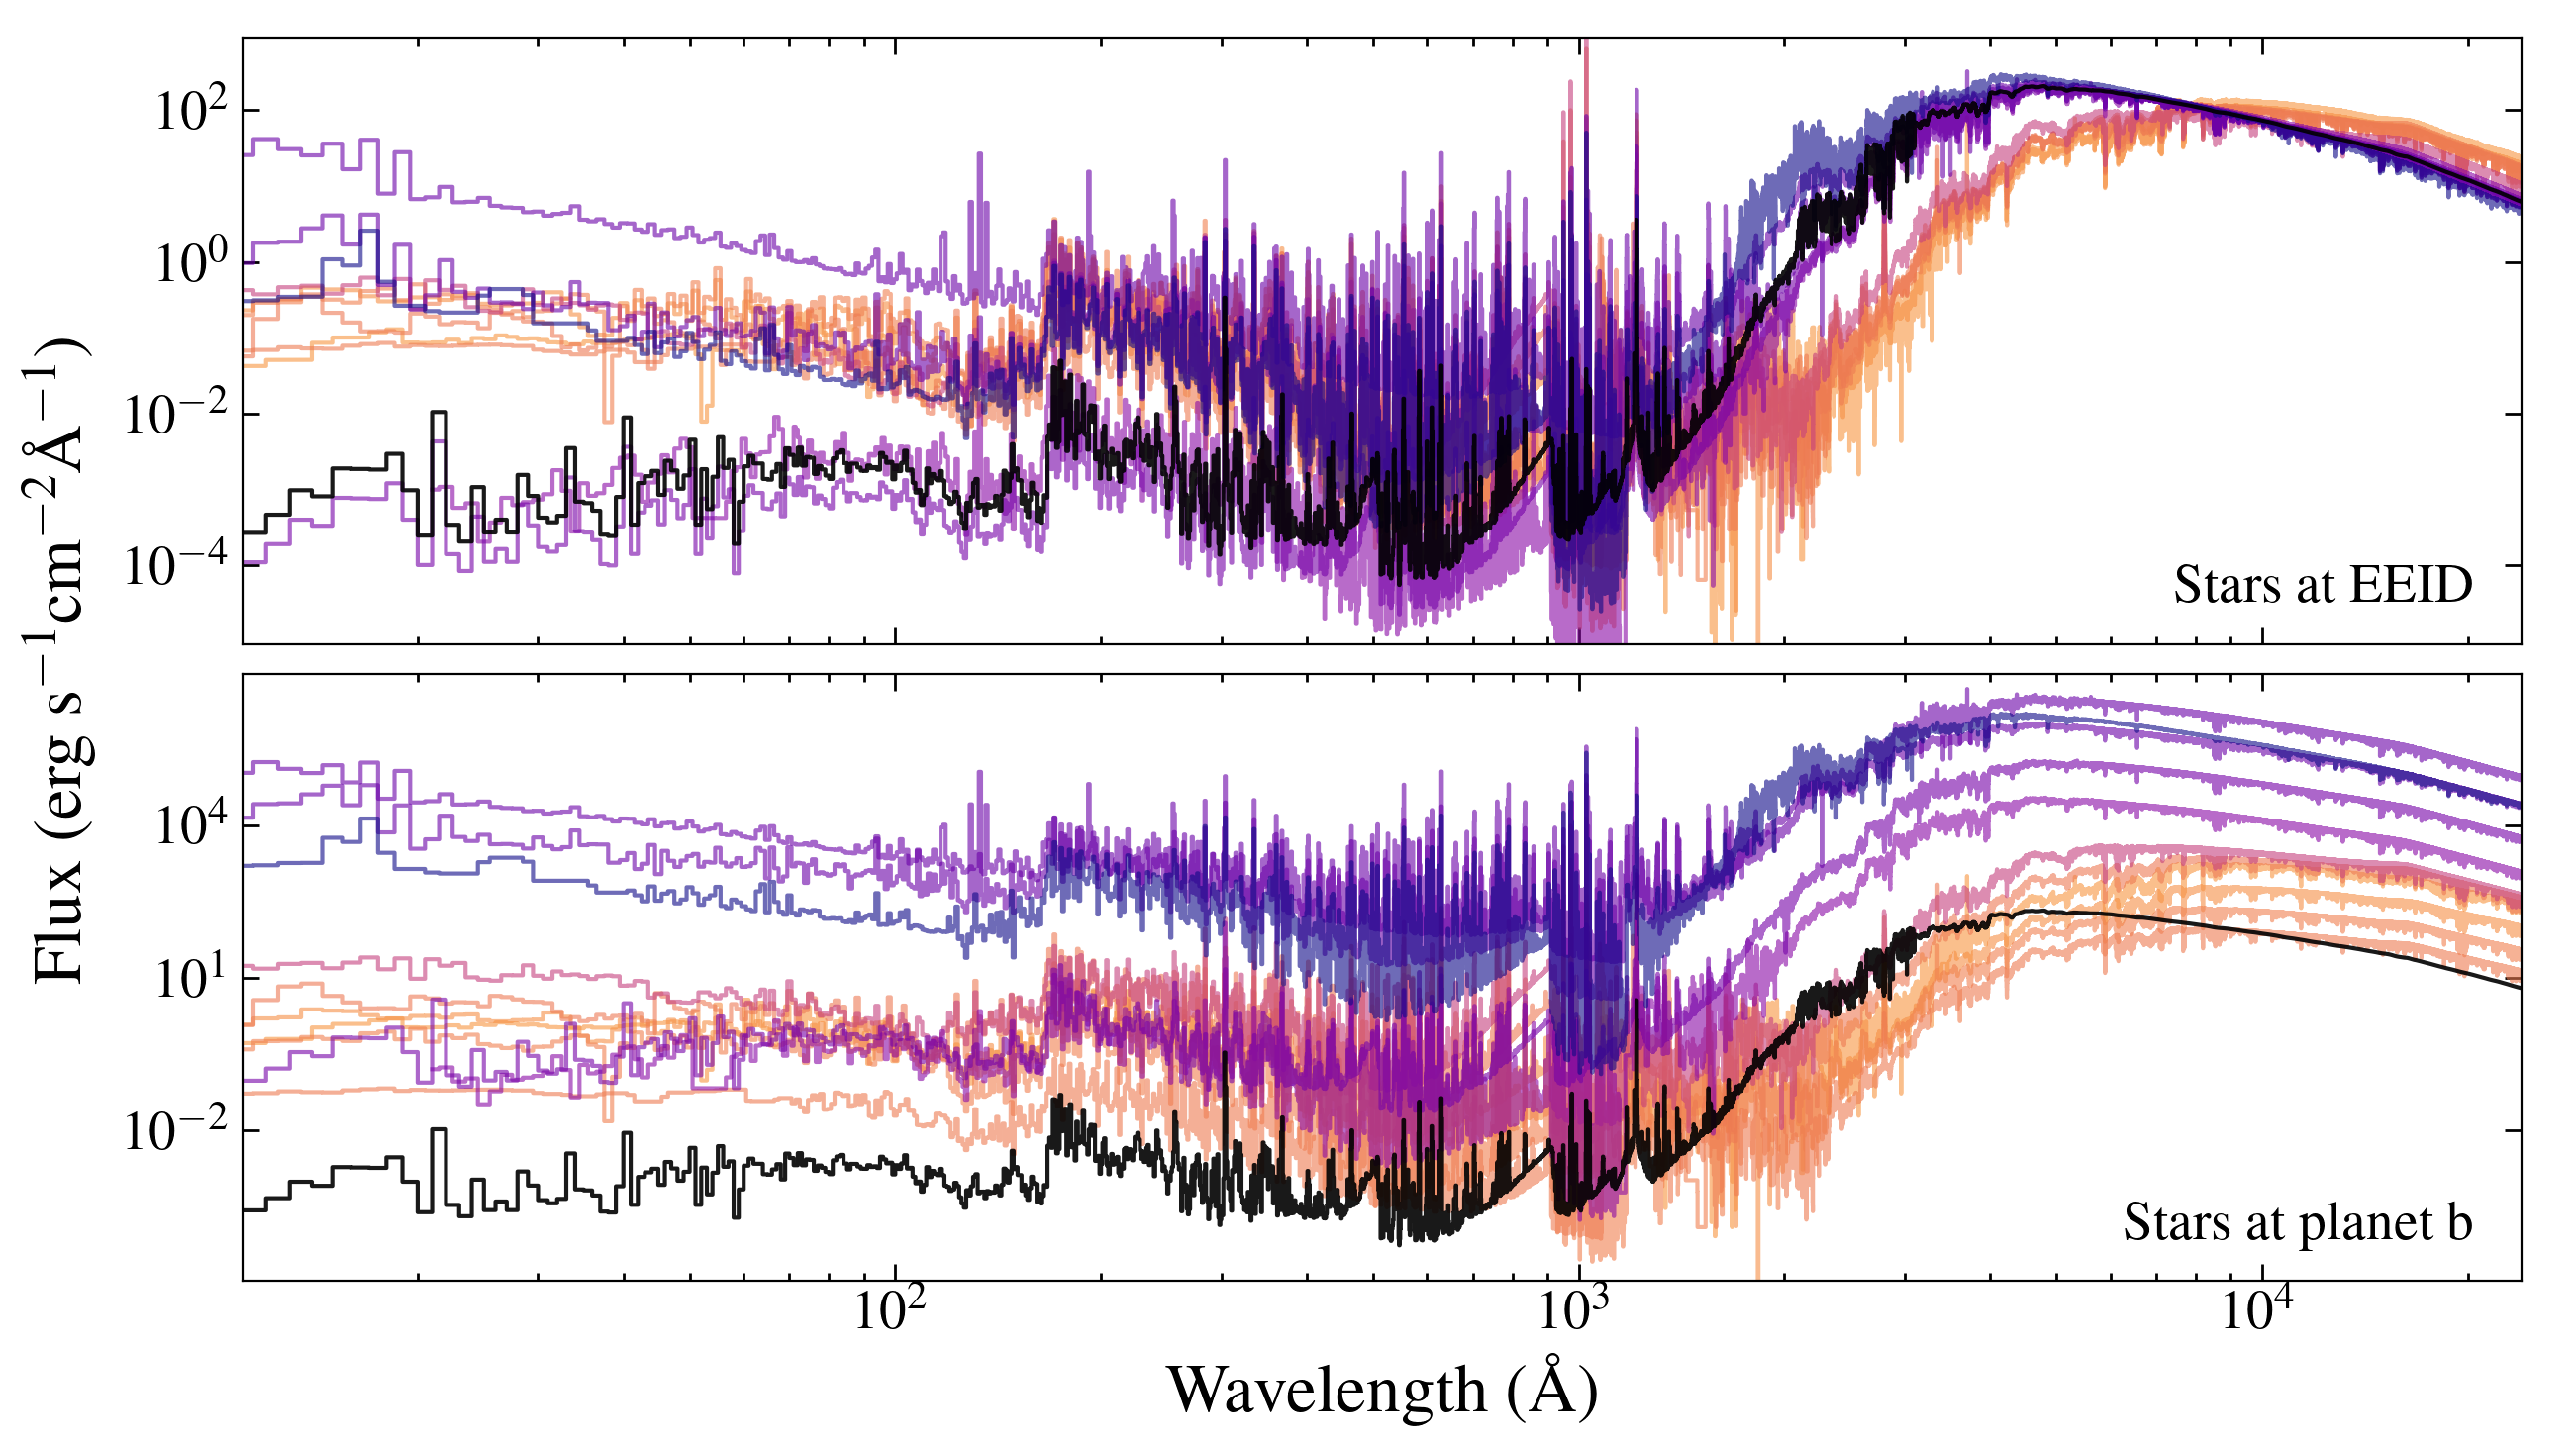

In [273]:
fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(14, 8))

names = np.array([n.lower() for n in params['Name']])

ax = axes[0]
ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-1000, vmax=max(teffs))


for i, spec in enumerate(seds_sort):


    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    scale = (dstar/(eeid.to(u.pc)))**2
    a_planet_b = planet_as_temp[i] 
    # scale10 = (dstar/(10*u.pc))**2
    scale_planetb = (dstar/((a_planet_b*u.au).to(u.pc)))**2
    
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')
    ax.step(w, f*scale, c=plt.cm.plasma_r(norm(teffs[i])), alpha=0.6, where='mid')
    ax1.step(w, f*scale_planetb, c=plt.cm.plasma_r(norm(teffs[i])), alpha=0.6, where='mid')

ax.step(sw, sf, c='k', alpha=0.9, label = 'Sun (G2)', where='mid')
ax1.step(sw, sf, c='k',alpha=0.9, label = 'Sun (G2)', where='mid')
ax.annotate('Stars at EEID', (0.98, 0.05), xycoords='axes fraction', va='bottom', ha='right')
ax1.annotate('Stars at planet b', (0.98, 0.05), xycoords='axes fraction', va='bottom', ha='right')

    

ax.set_yscale('log')
ax.set_xscale('log')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax.set_ylim(9.1e-6, 9.1e2)
ax1.set_ylim(1.1e-5, 9.1e6)
ax.set_xlim(11.1, sw[-1])

bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
bigax.set_xlabel('Wavelength (\AA)', size=25)

# fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),cax=bigax)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

fig.savefig('../plots/stars_eeid_planet_b.pdf')


In [276]:
xrays = glob.glob('../draft_hlsp/*/*epic*.fits')
for x in xrays:
    data = fits.getdata(x, 1)
    print(data['WAVELENGTH'][-1])

58.668915
40.11478
70.20434
73.48241
34.69384
56.56202
40.42364
